# SubTak3 Dimensionality Reduction




In [3]:
import numpy as np
import pandas as pd                # for data manipulation 
import matplotlib.pyplot as plt   # for visualization
from sklearn.decomposition import PCA   #importing PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler #for scaling the dataset



In [4]:
df = pd.read_csv('energydata_complete.csv')   # import the dataset
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [5]:
print('shape of data:\n{}'.format(df.shape))  # get the shape of dataset

shape of data:
(19735, 26)


In [6]:
df.describe()    # gaining insights into attributes of the dataset

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


## Decide on Normalization

- As we can see the mean values and standard deviations differ significantly across columns. Additionally, the range of values 
(min to max) also varies widely across different columns. as a result normalization is essential before employing PCA when dealing with datasets where
the features have significantly different scales. This ensures that the principal components are not skewed towards features with larger scales.

## Normalize Data

In [7]:
# Normalizing the data before applying PCA which avoids the case that all our variance will be on only one component
def normalize_data(data):
    scaler = StandardScaler()  # initialize standardscaler
    normalized_data = scaler.fit_transform(data)
    df_normalized = pd.DataFrame(normalized_data, columns = df.columns) # convert df_normalized to dataframe 
    return df_normalized
    
df_normalized = normalize_data(df)
df_normalized

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.957509,1.141572,-1.217324,0.958136,-0.152788,-2.976328,0.822080,1.207694,2.091596,0.366854
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.957509,1.134554,-1.200778,0.965363,-0.175352,-2.962813,0.822080,1.071703,1.766584,0.343017
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.957509,1.109032,-1.233869,0.950910,-0.196035,-2.949298,0.822080,0.935713,1.441572,0.319180
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-2.008631,1.082233,-1.233869,0.926821,-0.218599,-2.935783,0.822080,0.799723,1.116559,0.295343
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-2.008631,1.082233,-1.233869,0.926821,-0.241162,-2.922268,0.822080,0.663733,0.791547,0.271506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.022483,-0.479080,2.415962,1.583299,2.530318,0.394449,2.458745,0.590209,1.882026,1.511812,...,1.365409,1.366295,1.843571,1.261649,2.874478,-0.043599,-1.616282,-0.288198,-1.243314,2.273822
19731,-0.075056,-0.479080,2.374452,1.568221,2.468301,0.407788,2.425512,0.608646,1.882026,1.511812,...,1.365409,1.311932,1.843571,1.261649,2.855675,-0.043599,-1.593912,-0.220203,-1.172659,2.273822
19732,1.680659,0.781035,2.374452,1.592514,2.411103,0.576982,2.383971,0.752037,1.882026,1.544061,...,1.365409,1.287048,1.843571,1.261649,2.836872,-0.043599,-1.571542,-0.152208,-1.102004,2.273822
19733,3.143756,0.781035,2.374452,1.691361,2.313256,0.642694,2.304213,0.629130,1.882026,1.557883,...,1.346238,1.260011,1.843571,1.268273,2.799266,-0.043599,-1.549171,-0.084213,-1.031349,2.249985


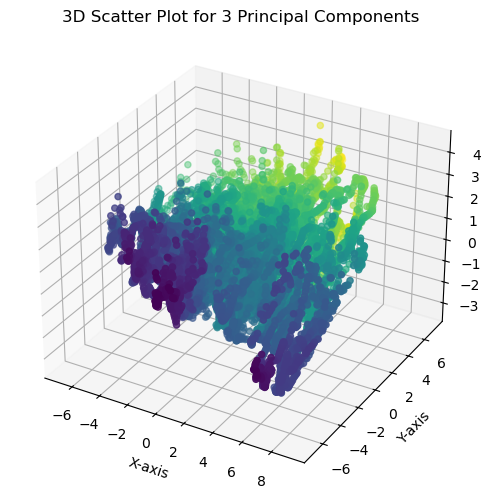

explained variance ratio is :
[0.35879536 0.27166393 0.07196565]

comulative_explained_variance is:
[0.35879536 0.63045928 0.70242493]



In [8]:
# #Apply PCA for dimensionality reduction on our dataset and set number of componenets =3 as we are asked in task 
def reduce_dimension(data, n_components):
    pca = PCA(n_components = 3)              # initialise pca with set components on 3
    df_projected = pca.fit_transform(data)   #fit_transform pca on our data to get df_projected
    
    fig = plt.figure(figsize = (15, 6))
    ax = fig.add_subplot(111, projection='3d')   # set up a 3d subplot for plotting
    
    
    # visualize thee different components extracted from our dataset
    component_1 = df_projected[:, 0]    
    component_2 = df_projected[:, 1]
    component_3 = df_projected[:, 2]
    
    # Plot the values
    ax.scatter(component_1, component_2, component_3, c = component_2, marker = 'o') 
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('3D Scatter Plot for 3 Principal Components')
    
    plt.show()
    explained_variance_ratio = pca.explained_variance_ratio_    # portion of the variance that lies along each principal component
    print('explained variance ratio is :\n{}\n'.format(explained_variance_ratio))   # the extent to which each component explain the original dataset
    comulative_explained_variance = explained_variance_ratio.cumsum()    #cumulative sum of explained variances for each component                          
    print('comulative_explained_variance is:\n{}\n'.format(comulative_explained_variance))
    
    
    
df_projected_3 = reduce_dimension(df_normalized, 3)
df_projected_3

- When examining the cumulative explained variance for a model with three components, we observe that the first component accounts for approximately 35.9% of the total variance, the second around 27.1%. Together, these two components explain approximately 63.0% of the total variance. Adding the third component increases the cumulative explained variance to approximately 70.2%.
- As we can see from the comulative explained variance, with three components we get %70.24 of the original variability in the data. However, depending
on the specific application and the desired trade-off between dimensionality reduction and information retention, the number of components may vary.

## Bar plot to show explained variance ratio described by three components

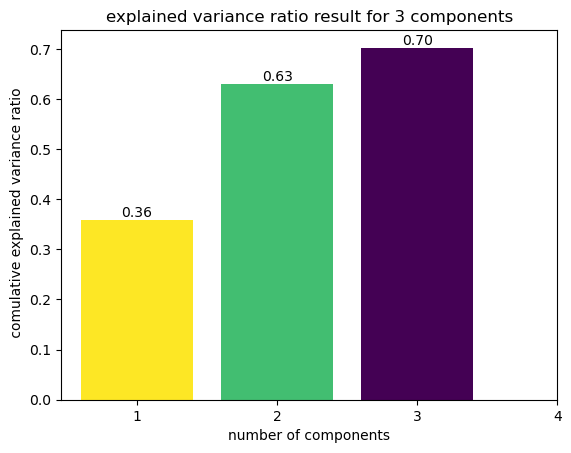

In [9]:
# draw bar chart for comulative explained variance with three components
pca = PCA(n_components = 3)
pca.fit(df_normalized)
# Using a colormap
colormap = plt.cm.viridis  # Choosing the 'viridis' colormap

#Since colormap values are typically used to represent scalar data, normalization helps to map the range of values of the explained variance ratios to the full range of colors in the colormap.
norm = plt.Normalize(vmin=min(pca.explained_variance_ratio_), vmax=max(pca.explained_variance_ratio_))
colors = colormap(norm(pca.explained_variance_ratio_))
# calculating comulative explained
comulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.bar(range(1, 4), comulative_explained_variance, color = colors)
# annotate each bar with its value
for i, value in enumerate(comulative_explained_variance):  # add the values on the bars
    plt.text(i+1, value, s = f'{value:.2f}', ha='center', va='bottom')
    
plt.xlabel('number of components')
plt.ylabel(' comulative explained variance ratio')
plt.xticks([1, 2, 3, 4])
plt.title('explained variance ratio result for 3 components')
plt.show()                      

- above graph shows bar plot for comulative explained variance ratio for n_componenets = 3

## Apply PCA on normalized dataset with 

- We also decided on drawing plot for both individual variance ratio and comulative variance ratio, for n_components = 5, to check if adding more components help to explain more variance from data or not.

projected_df is :

[[-2.92782906 -4.68959975  1.57251556  1.96344397 -0.3676376 ]
 [-2.94388937 -4.61803228  1.50261845  1.96411377 -0.4925733 ]
 [-2.98196892 -4.53272708  1.41869256  1.92098268 -0.62885552]
 ...
 [ 7.86997229 -2.70674434  1.41359946  0.97429933  0.61963507]
 [ 7.77405302 -2.6896907   1.70288394  1.77127556  0.68421469]
 [ 7.67316928 -2.64741559  1.65551214  1.84379762  0.67698875]]

explained variance ratio is :

[0.35879536 0.27166393 0.07196565 0.04876284 0.04022135]

comulative_explained_variance is:

[0.35879536 0.63045928 0.70242493 0.75118777 0.79140912]



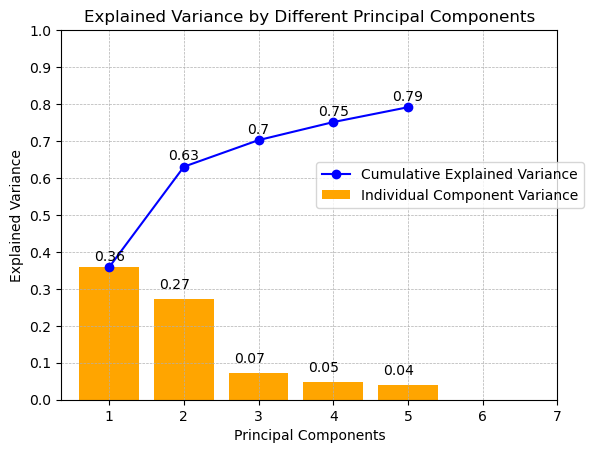

In [10]:
#Apply PCA for dimentionality reduction on our dataset and set components=5 
def explained_variance_ratio(data):
    
    pca = PCA(n_components = 5)                                          # initialise PCA and set components on 7
    projected_df = pca.fit_transform(data)                               # fit and then transform original dataset into a newdataset
    print('projected_df is :\n\n{}\n'.format(projected_df))
    
    explained_variance_ratio = pca.explained_variance_ratio_              # portion of the variance that lies along each principal component
    print('explained variance ratio is :\n\n{}\n'.format(explained_variance_ratio))   # the extent to which each component explain the original dataset
                                  
                                                         
    comulative_explained_variance = explained_variance_ratio.cumsum()                  #cumulative sum of explained variances for each component                          
    print('comulative_explained_variance is:\n\n{}\n'.format(comulative_explained_variance))
    principal_components = np.arange(1, len(explained_variance_ratio) + 1) 
    
    # individual component variance
    plt.bar(range(1, len(principal_components) + 1), explained_variance_ratio, color = 'orange', label = 'Individual Component Variance')
    # Text labels for individual explained variance (adjusted positions)
    for i, value in enumerate(explained_variance_ratio):
        if i > 0:
            bar_width = 0.5
            x_pos = principal_components[i] - bar_width/4                # Adjust x-position for better placement
            y_pos = value + 0.02                                         # Adjust y-position to avoid overlapping bars
            plt.text(x_pos, y_pos, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

    
    plt.title('individual variance explained ration')

    # Cumulative explained variance
    plt.plot(np.arange(1, len(principal_components) + 1), comulative_explained_variance, marker = 'o', label='Cumulative Explained Variance', color = 'blue')
    for i, value in enumerate(comulative_explained_variance):
      plt.annotate(str(round(value, 2)), (principal_components[i], value + 0.01), ha='center', va='bottom', fontsize=10)

    
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance by Different Principal Components')
    plt.xticks(np.arange(1, 8))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(bbox_to_anchor=(0.5, 0.5), loc='lower left', fontsize=10)

explained_variance_ratio(df_normalized)


- As we can see from the above graph, with **3 componenets**, we already capture approximately **70%** of the total variance.
- By adding the 4th and 5th components, the cumulative explained variance increases but at a diminishing rate. This means that the additional components
provide less explanatory power compared to the first few components.
- Therefore, considering the trade-off between capturing variance and the complexity of the model, choosing 3 components seems justified as it captures
a significant portion of the total variance while keeping the model relatively simple
- As we can see from the bar plot of individual explained variance ratio, the elbow point is on n_componenets = 3. from this point explained variance decrease in a very diminishing rate. 